In [1]:
import pandas as pd

Load the dataset first

In [16]:
df  = pd.read_excel("Bankruptcy (2).xlsx")
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


preprocessing steps - 

- variable encoding
- scaling
- correlations

In [17]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Our data is perfectly scaled between 0 and 1. SO we can skip feature scaling in data preprocessing.


Label encoding -

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['class'] = le.fit_transform(df['class'])

In [21]:
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class, Length: 250, dtype: int32

 Collinearity

In [22]:
correlation_matrix = df.corr()
print(correlation_matrix)

                       industrial_risk  management_risk  \
industrial_risk               1.000000         0.255127   
management_risk               0.255127         1.000000   
financial_flexibility        -0.162624        -0.254845   
credibility                  -0.014438        -0.303341   
competitiveness              -0.257814        -0.306568   
operating_risk                0.144507         0.213874   
class                        -0.227823        -0.370838   

                       financial_flexibility  credibility  competitiveness  \
industrial_risk                    -0.162624    -0.014438        -0.257814   
management_risk                    -0.254845    -0.303341        -0.306568   
financial_flexibility               1.000000     0.524951         0.686612   
credibility                         0.524951     1.000000         0.675689   
competitiveness                     0.686612     0.675689         1.000000   
operating_risk                     -0.116903    -0.288458  

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix')

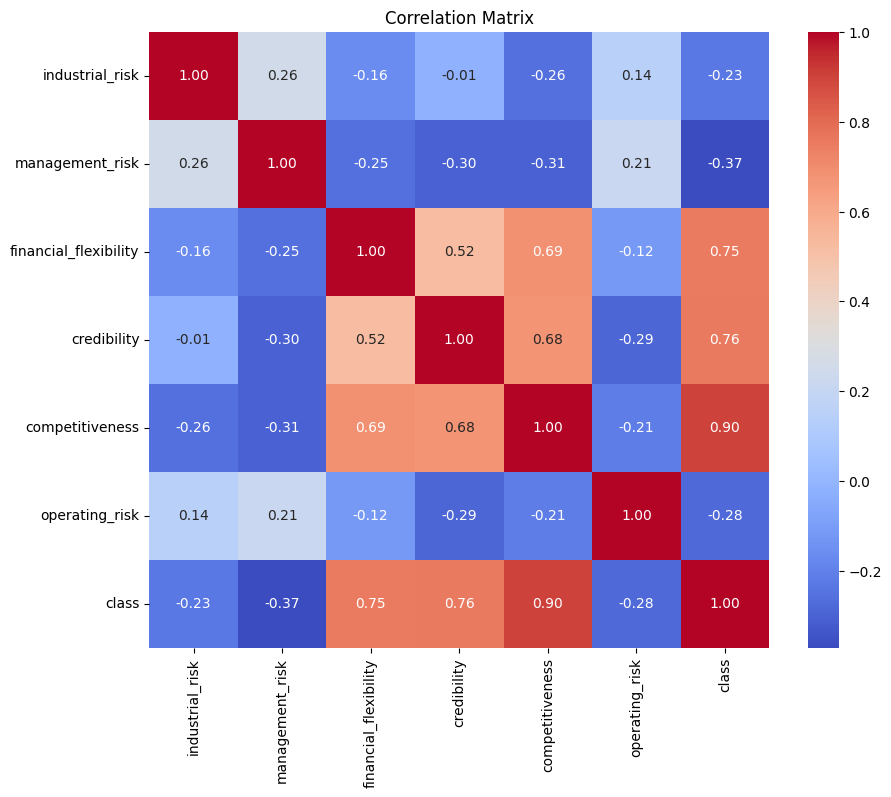

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = "coolwarm", fmt=".2f")
plt.title("Correlation Matrix")

We see that competitiveness has moderate to high collinearity with financial_flexibility and credibility.

But since it also has very high correlation with our Y variable i.e. Class, removing it will cause very much loss of error. 

So we will use PCA to determine the number of components that capture most of the variance.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('class', axis=1))
X_scaled

array([[-0.04382742,  0.94173236, -0.93817234, -1.13294134, -1.08231025,
        -0.16140004],
       [-1.26125562,  0.94173236, -0.93817234, -1.13294134, -1.08231025,
         0.9914574 ],
       [ 1.17360079, -1.49798878, -0.93817234, -1.13294134, -1.08231025,
         0.9914574 ],
       ...,
       [-1.26125562,  0.94173236,  1.55696687,  0.0723154 ,  0.05457026,
        -1.31425748],
       [ 1.17360079, -1.49798878,  0.30939726,  1.27757215,  0.05457026,
        -1.31425748],
       [ 1.17360079, -1.49798878,  0.30939726,  0.0723154 ,  1.19145078,
         0.9914574 ]])

In [29]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.86886516, -0.50173334, -0.27521769,  0.64063811,  0.13805036,
        -0.01834052],
       [-1.90332685, -0.95233568,  1.21647726,  0.72703785, -0.39460248,
        -0.31941166],
       [-1.6010433 , -0.24731439,  0.02485947, -2.2529689 ,  0.38050704,
         0.30600549],
       ...,
       [ 1.10904128, -0.50267445, -0.03305633,  1.89721324,  0.97181269,
        -0.78081155],
       [ 1.40364893,  0.23341091, -1.80900566, -1.29309347,  0.13433502,
        -0.30352593],
       [ 0.83147877,  0.87782738,  0.47083997, -1.81651016,  0.16762173,
         1.05516528]])

In [31]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

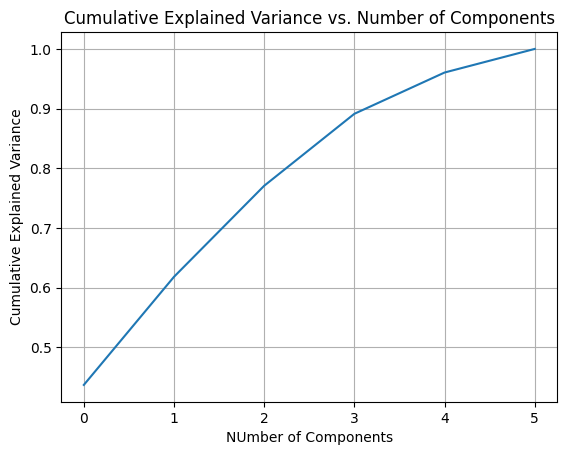

In [33]:
plt.plot(cumulative_variance)
plt.xlabel('NUmber of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [34]:
n_components = 3

In [35]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [36]:
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)]) 

In [37]:
df_pca = pd.concat([pca_df, df['class']], axis=1) 


In [38]:
df_pca

,PC1,PC2,PC3,class
0,-1.868865,-0.501733,-0.275218,0
1,-1.903327,-0.952336,1.216477,0
2,-1.601043,-0.247314,0.024859,0
3,-0.743208,-0.731074,0.342044,0
4,-2.428168,0.765267,0.078508,0
...,...,...,...,...
245,1.727700,0.891827,1.743189,1
246,1.193533,1.449053,-1.572732,1
247,1.109041,-0.502674,-0.033056,1
248,1.403649,0.233411,-1.809006,1


Model Building 

In [40]:
X_pca = df_pca.drop('class', axis=1)
y = df_pca['class']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

Model 1: Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [55]:
from sklearn.linear_model import LogisticRegression

print("\n--- Logistic Regression ---")
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_lr)}")


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[21  0]
 [ 0 29]]
ROC AUC: 1.0


2. Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt) 

print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_dt)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[21  0]
 [ 0 29]]
ROC AUC: 1.0


3. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
print("\n--- Random Forest ---")
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf) 

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf)}")


--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[21  0]
 [ 0 29]]
ROC AUC: 1.0


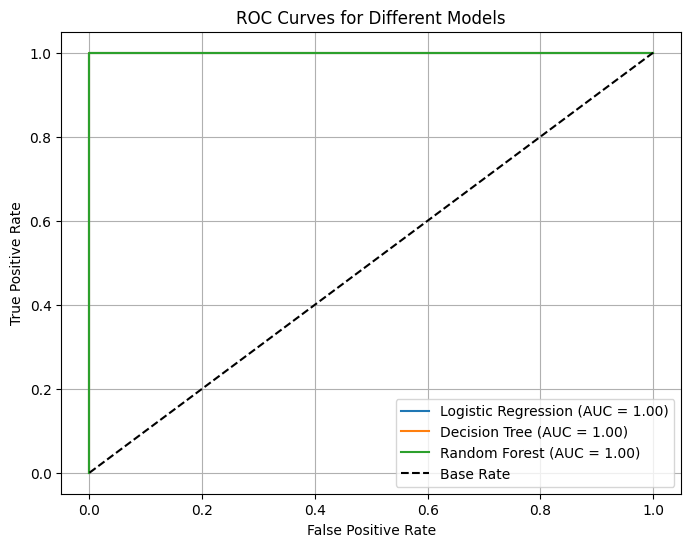

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dt):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Base Rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
import pickle

In [60]:
model_lr = LogisticRegression().fit(X_train, y_train)
model_dt = DecisionTreeClassifier().fit(X_train, y_train)
model_rf = RandomForestClassifier().fit(X_train, y_train)

# Save the models to pickle files
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model_lr, file)

with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model_dt, file)

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the PCA object
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file) 